In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from ast import literal_eval
import re

In [2]:
plt.style.use('ggplot')

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('../scripts/'))
if module_path not in sys.path:
    sys.path.append(module_path) #"/Volumes/tuba/herpov/tcr-pmhc-sc-project/scripts/"
from D_plot_specificity_matrix_utils import (calc_binding_concordance,
                                             epitope_sorter_index,
                                             initialize_plotting_frame,
                                             filter_low_level,
                                             peptides_per_gem,
                                             peptide_per_clonotype_by_gem_size,
                                             peptide_per_clonotype_read_counts,
                                             mhc_read_count_per_clonotype,
                                             mhc_read_count_per_clonotype_response,
                                             mhc_read_count_per_clonotype_peptide_assayed,
                                             tcr_read_count_per_clonotype_detected_response,
                                             multiple_peptides_per_gem)

# Args

In [4]:
PLATFORM = "IONTORRENT"
EXP = "exp3"
PRJ = "specificity_matrix"

In [5]:
MAPPING = 'KMA' # BLAST
BARCODE_SYSTEM = 'AKB' #'10x'

In [6]:
def epitope_converter(x):
    #define format of datetime
    return x.replace("[","").replace("]","").replace("'","").split(" ")

def peptide_hla_converter(x):
    return re.findall("\w+\s{1}\w{1}\d+", x.replace("[","").replace("]","").replace("'",""))

In [7]:
converters={'peptide_HLA_lst': peptide_hla_converter, 'epitope_lst': epitope_converter, 'umi_count_lst_mhc': literal_eval}

## Plotting directory

In [8]:
FIG_DIR = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/plots/" + EXP + "_" + PLATFORM + "_" + MAPPING + "_" + BARCODE_SYSTEM + "/" + PRJ + "/"
#TAB_DIR = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/tables/" + EXP

In [12]:
FIG_SUND = ("/Volumes/sund/Public/T-cells-and-cancer/herpov/plots/" +
            EXP + "_" + PLATFORM + "_" + MAPPING + "_" + BARCODE_SYSTEM + "/" + PRJ + "/")
#TAB_SUND = "/Volumes/sund/Public/T-cells-and-cancer/herpov/tables/" + EXP + PRJ

## Input data

In [8]:
merged_annotations = "/Volumes/tuba/herpov/tcr-pmhc-sc-project/data/" + EXP + "_CAT_" + PLATFORM + "_" + MAPPING + "_" + BARCODE_SYSTEM + "/tables/tcr_barcode.cleaned.csv"

# Import input data

In [9]:
credible_df = pd.read_csv(merged_annotations, converters=converters) #, dtype={'single_TRA':object, 'single_TRB':object}

In [10]:
credible_df.shape

(3164, 159)

In [11]:
credible_df['epitope_rank'] = epitope_sorter_index(credible_df)
#credible_df.sort_values(by=['epitope_rank'], inplace=True)

Sorted dataframe 3164


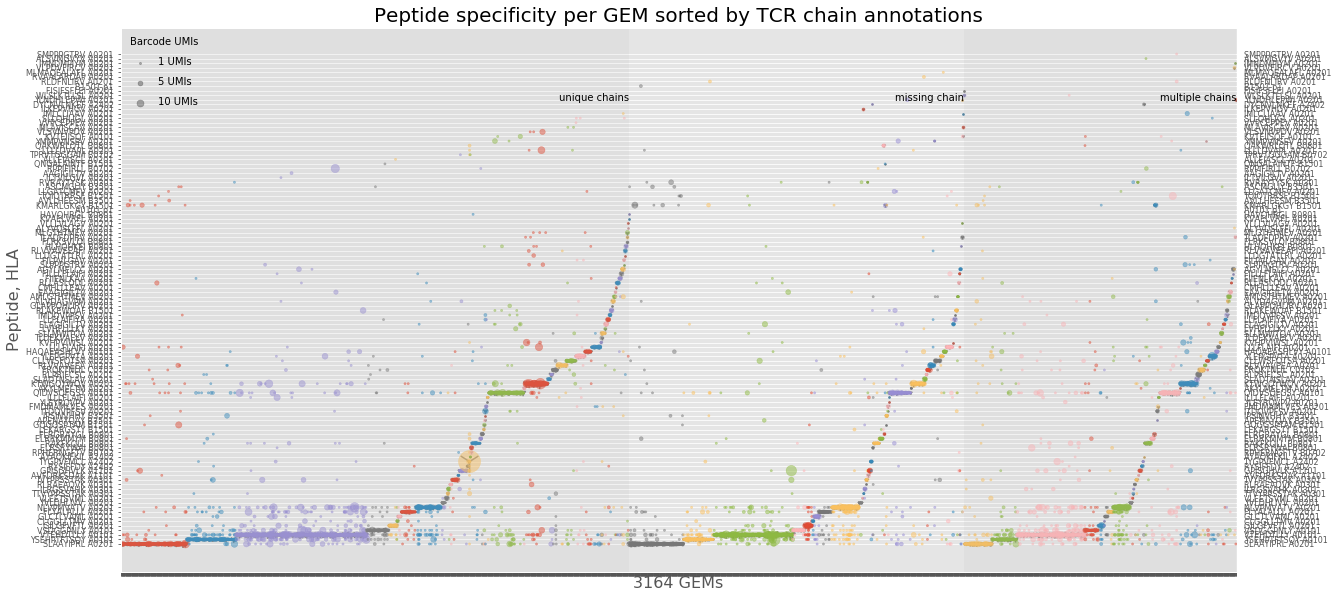

In [13]:
multiple_peptides_per_gem(credible_df, show=False, save_tuba='all_multiplets')

Sorted dataframe 771


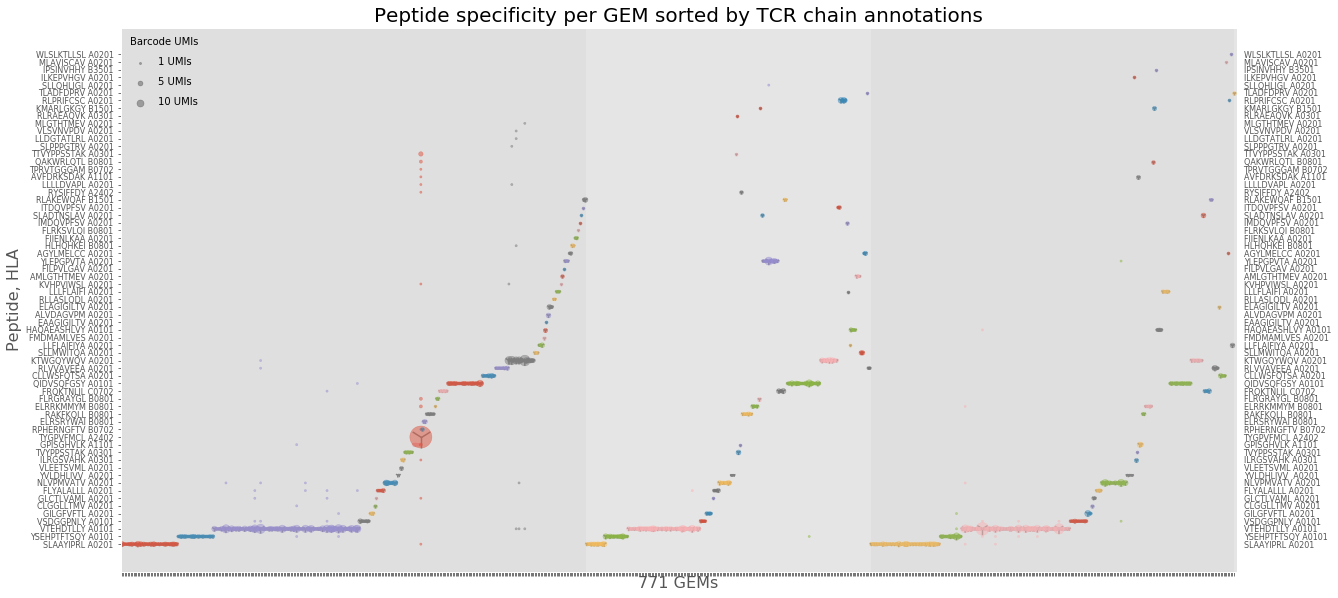

In [39]:
multiple_peptides_per_gem(credible_df[(credible_df.umi_delta > 0.9) & (credible_df.umi_count_mhc >= 2)].copy(), show=False, save_tuba='d90.bc_umi2')

In [25]:
credible_df.tcr_category.value_counts()

unique chains      1348
missing chain       951
multiple chains     865
Name: tcr_category, dtype: int64

In [34]:
np.savetxt("Leons_gems.lst", credible_df[(credible_df.umi_delta > 0.9) & (credible_df.umi_count_mhc >= 2)].gem.unique(), fmt="%s")

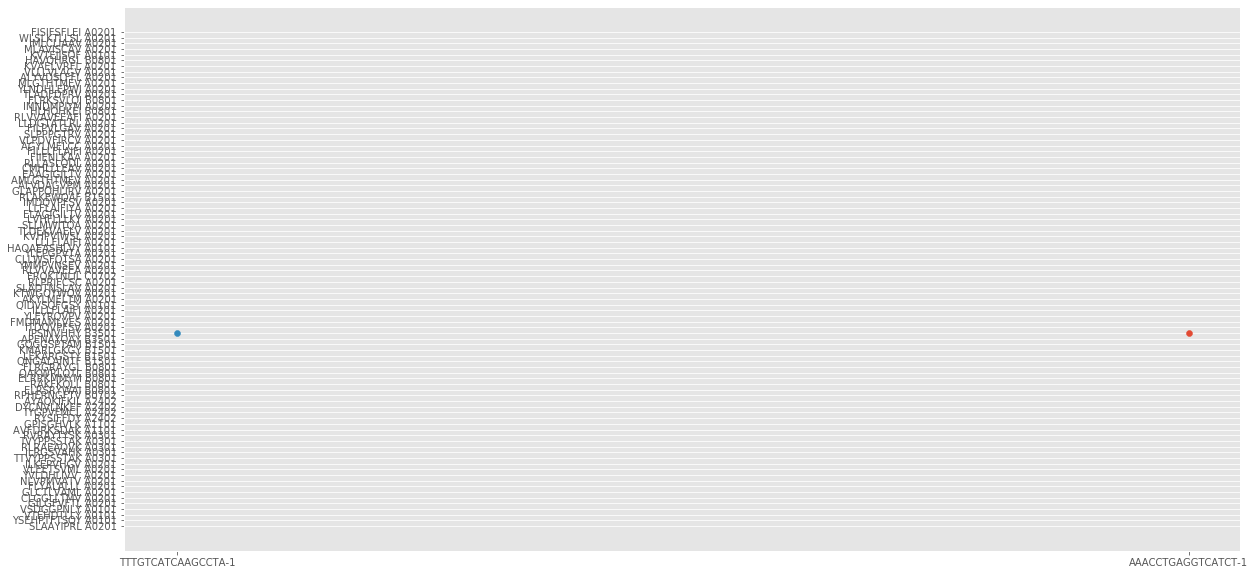

In [15]:
x = credible_df.gem.unique()
y = credible_df.peptide_HLA.unique()

fig, ax = plt.subplots(figsize=(20, 10))
sentinel, = ax.plot([x[-1]]*len(y), y) #np.append(y, [y[0]]*(len(x)-len(y)))
sentinel.remove()

#ax.set_xticks(np.arange(len(x)))
#ax.set_xticklabels(x)
#ax.set_yticks(np.arange(len(y)))
#ax.set_yticklabels(y)
#plt.scatter([],[])
ax.scatter('AAACCTGAGGTCATCT-1','IPSINVHHY B3501')
ax.scatter('TTTGTCATCAAGCCTA-1','IPSINVHHY B3501')
plt.show()

Sorted dataframe 3164
UMI filtering 3164
After filtering 3164


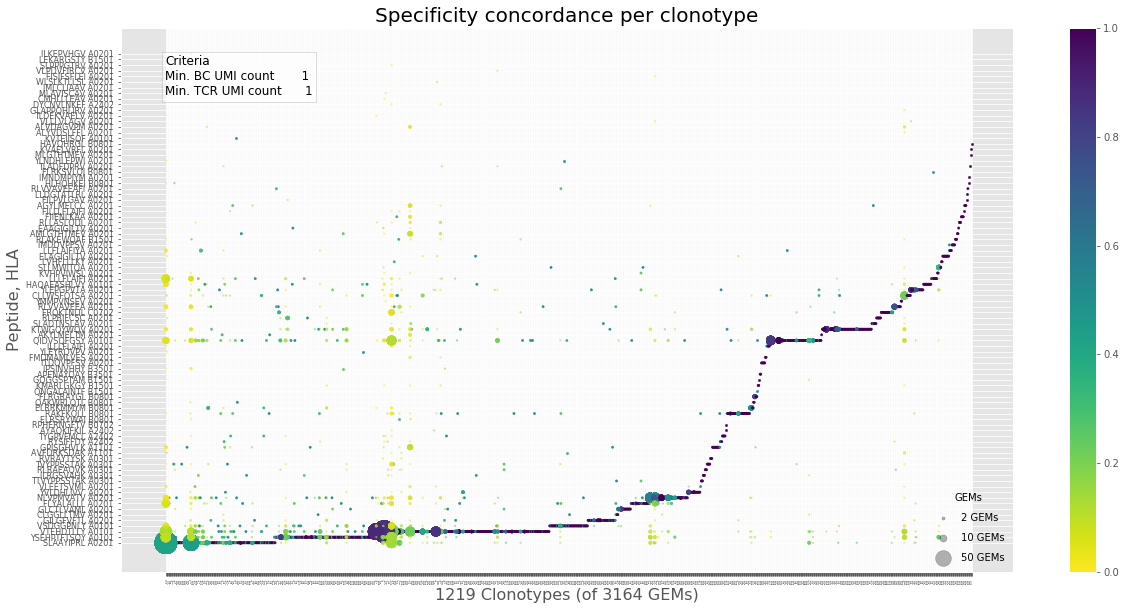

OBS! Figures are not saved!


In [13]:
peptide_per_clonotype_by_gem_size(credible_df, clonotype_fmt='ct')

3164
3164
3164


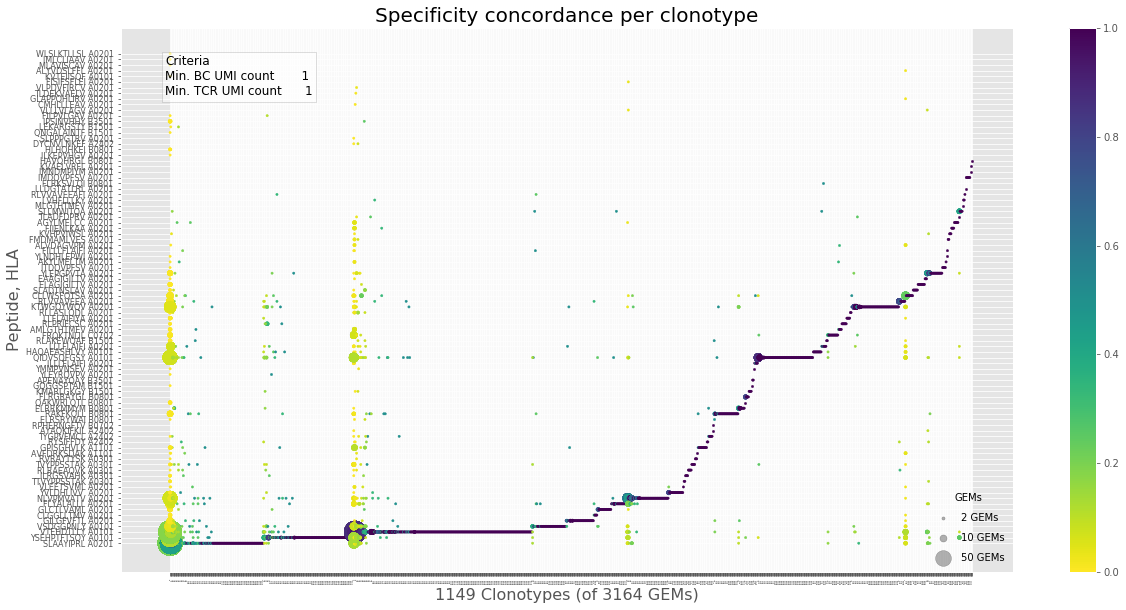

OBS! Figures are not saved!


({'TAGTTGGTCCACGAAT-1',
  'CGAGCACTCAGCTGGC-1',
  'CAAGGCCAGAAGGCCT-1',
  'ATCTGCCAGACCACGA-1',
  'TGTGTTTTCATTATCC-1',
  'TGCGCAGTCACAAACC-1',
  'CGCTATCAGTATGACA-1',
  'AGCTTGATCCAAGTAC-1',
  'ACTTGTTTCGAACGGA-1',
  'GAGTCCGAGCTGCAAG-1',
  'GGCCGATAGCACCGCT-1',
  'GGAAAGCCAGGCGATA-1',
  'GGACAAGGTCTCACCT-1',
  'GCAAACTTCTTGTACT-1',
  'ACACCCTAGCAGGTCA-1',
  'GTATTCTTCCGCATCT-1',
  'CGGACTGTCTCCAGGG-1',
  'CTACATTAGTACACCT-1',
  'GTCAAGTCAGCTCGAC-1',
  'GGAGCAAAGGTGCAAC-1',
  'AAGGAGCTCTCAAGTG-1',
  'CCTAAAGCACAAGCCC-1',
  'GAAATGATCATTGCCC-1',
  'TGGGAAGTCCTCAACC-1',
  'AACCATGGTCGAGTTT-1',
  'CGCCAAGGTCTAGTCA-1',
  'TGCGCAGAGTTCGATC-1',
  'GGCTCGATCGCAAACT-1',
  'TGCGTGGCAGGTCCAC-1',
  'GACTGCGCAGGGAGAG-1',
  'GATGAGGCAGCTGTGC-1',
  'ATGTGTGCAGGTCTCG-1',
  'ATCATGGGTCGAGTTT-1',
  'GACTACATCGATCCCT-1',
  'TGAGCATGTAGCGTAG-1',
  'TCGTACCGTGATGATA-1',
  'GGGAATGAGTGTTGAA-1',
  'ACAGCCGCAGATGGCA-1',
  'TGAGCATAGTACACCT-1',
  'GGAATAAGTACGAAAT-1',
  'GGTGCGTTCAAGCCTA-1',
  'TTCGAAGCAGACA

In [12]:
peptide_per_clonotype_by_gem_size(credible_df)

# Main

In [10]:
credible_df['epitope_rank'] = epitope_sorter_index(credible_df)

In [12]:
credible_df.drop(credible_df[credible_df.num_clonotype == 0].index, inplace=True)

2602
2602
2602


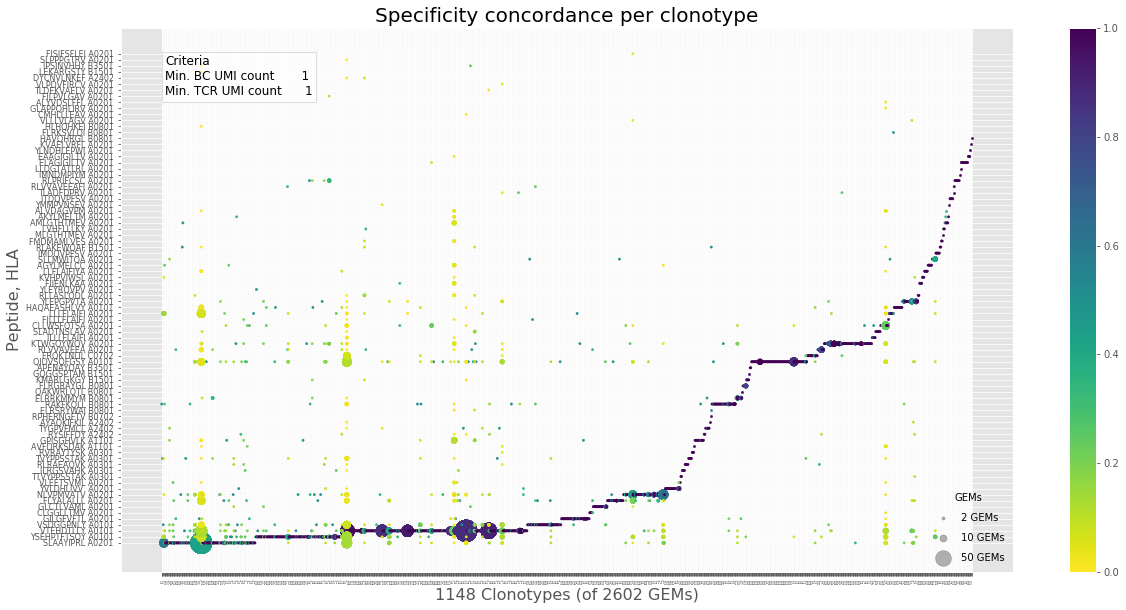

OBS! Figures are not saved!


In [13]:
unique_gems, unique_tcrs = peptide_per_clonotype_by_gem_size(credible_df, show=True)

In [ ]:
for i in range(5):
    if i == 0:
        project = "peptide_per_clonotype_by_gem_size/no_filtration/"
        plot_df = credible_df
        unique_gems, unique_tcrs = peptide_per_clonotype_by_gem_size(plot_df, show=True)
    if i == 1:
        project = "peptide_per_clonotype_by_gem_size/exclude_ambiguous_TCR_ann/"
        plot_df = credible_df[credible_df]
        unique_gems, unique_tcrs = peptide_per_clonotype_by_gem_size(plot_df, show=True)

In [26]:
np.savetxt("unique_tcrs.lst", unique_tcrs, fmt='%s')

In [29]:
np.savetxt("unique_gems.lst", list(unique_gems), fmt='%s')

In [13]:
peptides_per_gem(credible_df, show=False, save_tuba=False, save_sund=FIG_SUND)

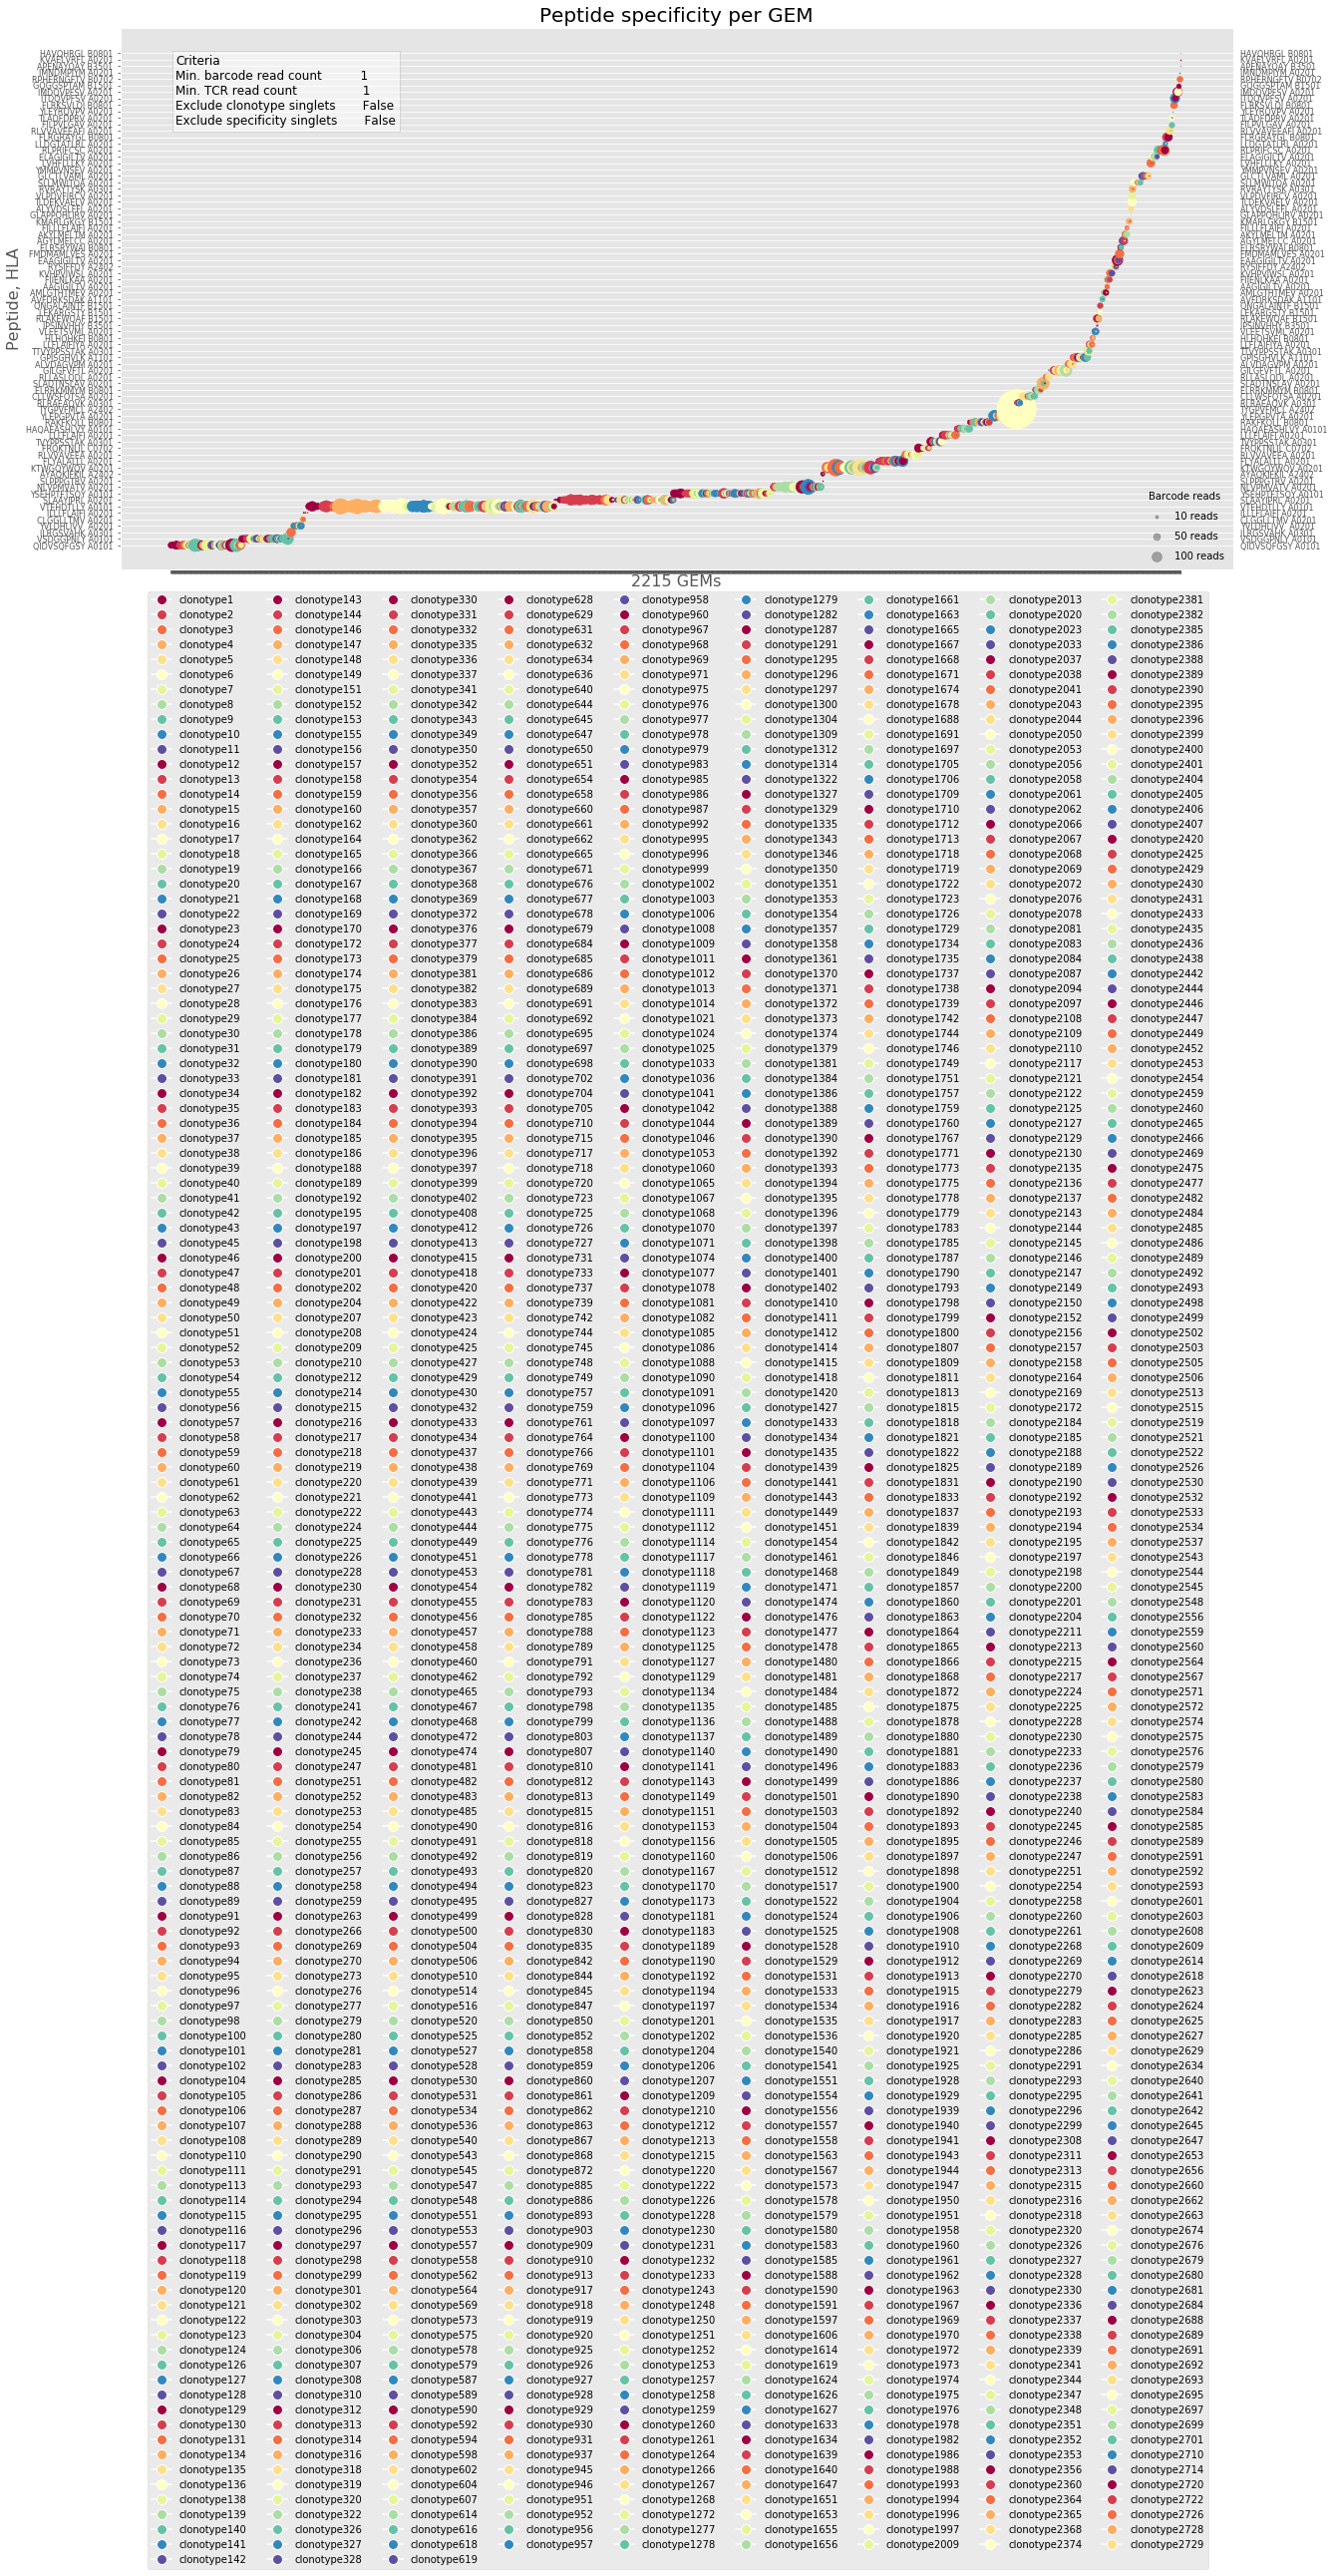

OBS! Figures at not saved!


In [13]:
peptides_per_gem(credible_df, show=True, save_tuba=False, save_sund=False)

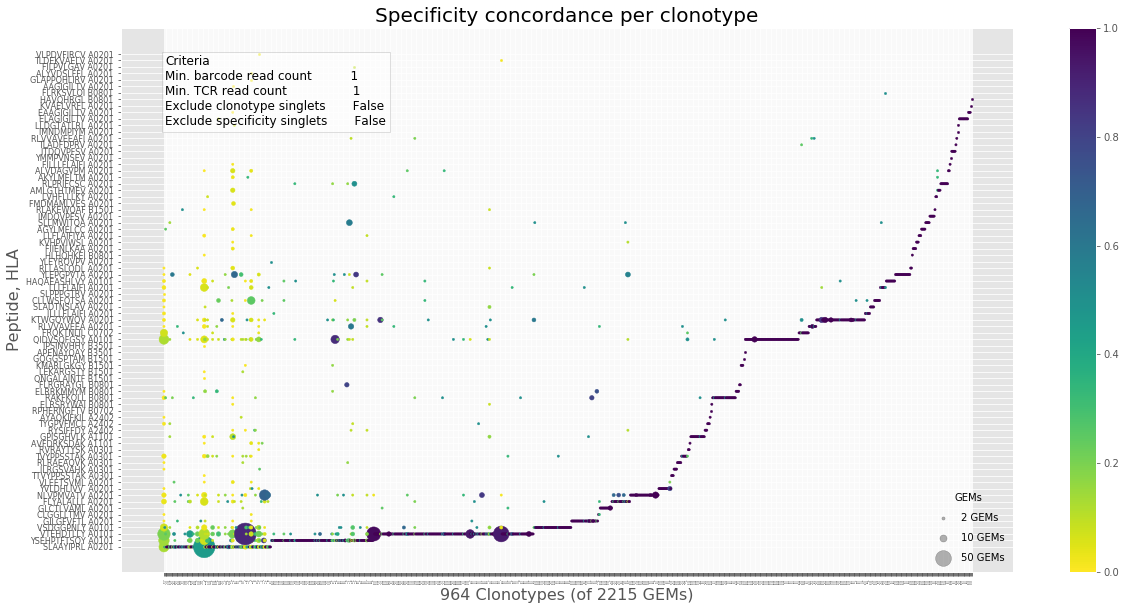

OBS! Figures are not saved!


In [10]:
peptide_per_clonotype_by_gem_size(credible_df, show=True, save_tuba=False, save_sund=False)

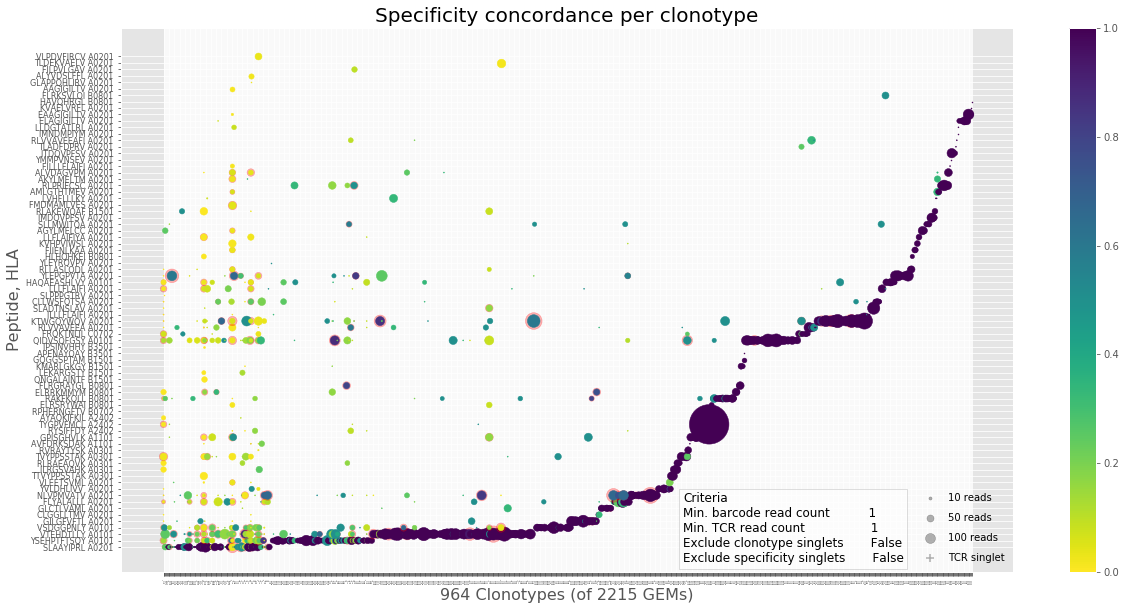

OBS! Figures are not saved!


In [17]:
peptide_per_clonotype_read_counts(credible_df, show=True, save_tuba=False, save_sund=False)

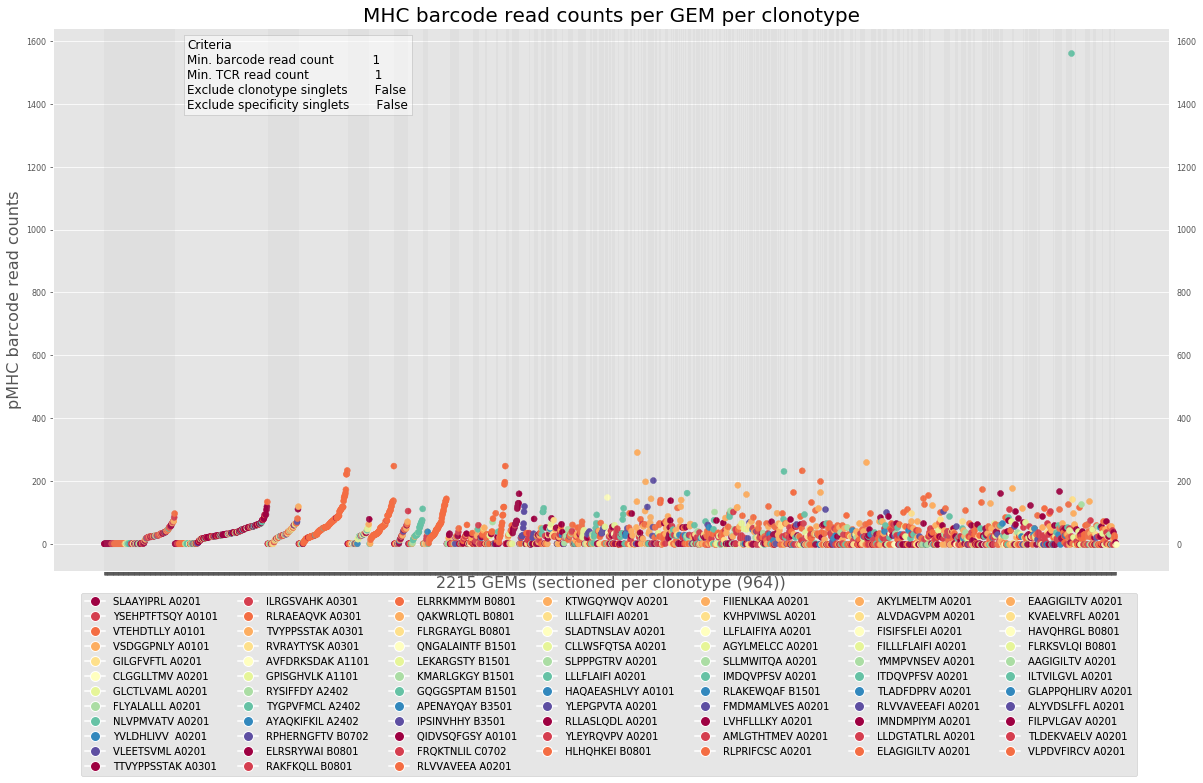

OBS! Figures at not saved!


In [18]:
mhc_read_count_per_clonotype(credible_df, show=True, save_tuba=False, save_sund=False)

In [14]:
mhc_read_count_per_clonotype(credible_df, show=False, save_tuba=False, save_sund=FIG_SUND)

In [ ]:
mhc_read_count_per_clonotype_response(credible_df, show=True, save_tuba=False, save_sund=False)

In [ ]:
mhc_read_count_per_clonotype_peptide_assayed(credible_df, show=True, save_tuba=False, save_sund=False)

In [12]:
tcr_read_count_per_clonotype_detected_response(credible_df, show=False, save_tuba='lol', save_sund=False)

(3164, 153)


# Missing plots and analyses

# MHC read count per clonotype (multiple barcodes per GEM)

In [47]:
from ast import literal_eval
literal_eval(sub_df.read_counts_lst_mhc)

ValueError: malformed node or string: 1054    [1 1 3 4]
Name: read_counts_lst_mhc, dtype: object

In [ ]:
from ast import literal_eval
import matplotlib as mpl
mpl.rcParams['axes.grid.axis'] = 'y'#both

project = "read_count_per_clonotype_multiple_barcodes/"
version = 1
read_threshold = 1
gems_threshold = 1
#clonotype_threshold = 2

all_clonotypes = credible_df.clonotype.unique()
num_clonotypes = len(all_clonotypes)

fig, ax = plt.subplots(figsize=(20, 10))

xmin, xmax = -0.5, 0

for i, clonotype in enumerate(credible_df.num_clonotype.unique()):
    for marker, response in [('o', True), ('+', False)]:
        sub_df = credible_df[(credible_df.num_clonotype == clonotype) &
                             (credible_df.read_counts_mhc >= read_threshold) &
                             (credible_df.peptide_assayed == response)].copy() # & (credible_df.clonotype != 'None') & (credible_df.epitope != '0')
        sub_df.drop(sub_df[~sub_df.duplicated(subset='num_clonotype', keep=False)].index, inplace=True)
        
        gems = sub_df.gem.to_list()
        mhc_read_counts = sub_df.read_counts_mhc.to_list()

        xmax += len(np.unique(gems))

        epitopes = sub_df.epitope.to_list()
        colors = [epitope_to_color[ep] for ep in epitopes]

        # How to show number of GEMs? Plot a different symbol if only one GEM?
        #ax.scatter(gems, [-5]*len(gems))
        scatter = ax.scatter(gems, mhc_read_counts, marker=marker, c=colors) #, edgecolors='face', cmap='viridis_r', norm=plt.Normalize(vmin=0, vmax=1), s=gems, edgecolors='face', alpha=0.3

    if i % 2 == 0:
        plt.axvspan(xmin, xmax-0.5, facecolor='0.7', alpha=0.1)
    #print(i)    
    #print(clonotype)
    #print(len(gems))
    #print(xmin, xmax)

    xmin = xmax-0.5
            
from matplotlib.lines import Line2D

legend_elements = []
for epitope_label in all_epitopes:
    legend_elements += [Line2D([0], [0], marker='o', color='w', label=epitope_label, markerfacecolor=epitope_to_color[epitope_label], markersize=10)]

legend1 = ax.legend(handles=legend_elements, ncol=8, loc=2, bbox_to_anchor=(0.02, -0.03))
ax.add_artist(legend1)

plt.tick_params(labelbottom=False, labelright=True, labelsize=8) #labelbottom=False, 
plt.xticks(rotation=90, size=2)

for marker, response in [('o', True), ('+', False)]:
    plt.scatter([], [], c='k', label=str(response), marker=marker)
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Peptide assayed', loc='upper right')

plt.xlabel("GEMs per clonotype", fontsize=16)
plt.ylabel("pMHC barcode read counts", fontsize=16)
plt.title("MHC barcode read counts per GEM per clonotype (min. read count per GEM: %i, min. GEM count: %i)"%(read_threshold, gems_threshold), fontsize=20)
#plt.savefig(FIG_DIR + project + "v%i.min_read_count_%i.min_gem_count_%i.pdf" %(version, read_threshold, gems_threshold), bbox_inches='tight')
plt.show()

# Binding concordance distribution

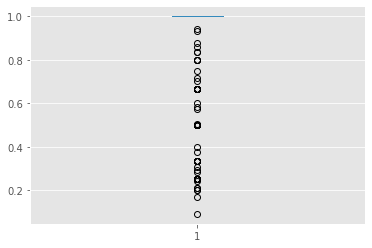

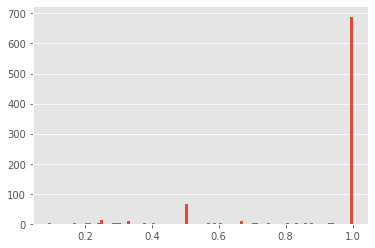

In [90]:
plt.boxplot(credible_df.groupby('clonotype').binding_concordance.max().values)
plt.show()
plt.hist(credible_df.groupby('clonotype').binding_concordance.max().values, bins=100)
plt.show()

In [91]:
credible_df.columns.values

array(['gem', 'clonotype', 'cdr3_TRA', 'cdr3_nt_TRA', 'cdr3_TRB',
       'cdr3_nt_TRB', 'umis_TRA', 'umis_diff_TRA', 'single_TRA',
       'umis_lst_TRA', 'cdr3_lst_TRA', 'umis_TRB', 'umis_diff_TRB',
       'single_TRB', 'umis_lst_TRB', 'cdr3_lst_TRB', 'match_mhc',
       'credible_alignment_mhc', 'match_cd8', 'credible_alignment_cd8',
       'template_id_mhc', 'read_counts_mhc', 'read_count_diff_mhc',
       'single_barcode_mhc', 'read_counts_lst_mhc', 'template_lst_mhc',
       'template_id_cd8', 'read_counts_cd8', 'read_count_diff_cd8',
       'single_barcode_cd8', 'read_counts_lst_cd8', 'template_lst_cd8',
       'detected_response', 'peptide', 'HLA', 'epitope', 'epitope_lst',
       '0', '134 (I-A22)neo26', '14 (A14)neo37', '147 (I-E15)neo26',
       '19 (A19)neo37', '20 (A20)neo37', '256 (II- E2)neo26',
       '29 (C5)neo37', '30 (C6)neo37', '31 (C7)neo37', '32 (C8)neo37',
       '40 (C16)neo37', 'A11_17_1_11', 'C2_MELPEP-014', 'CLYBL',
       'E14_MELPEP-126', 'E24_MELPEP-139', '

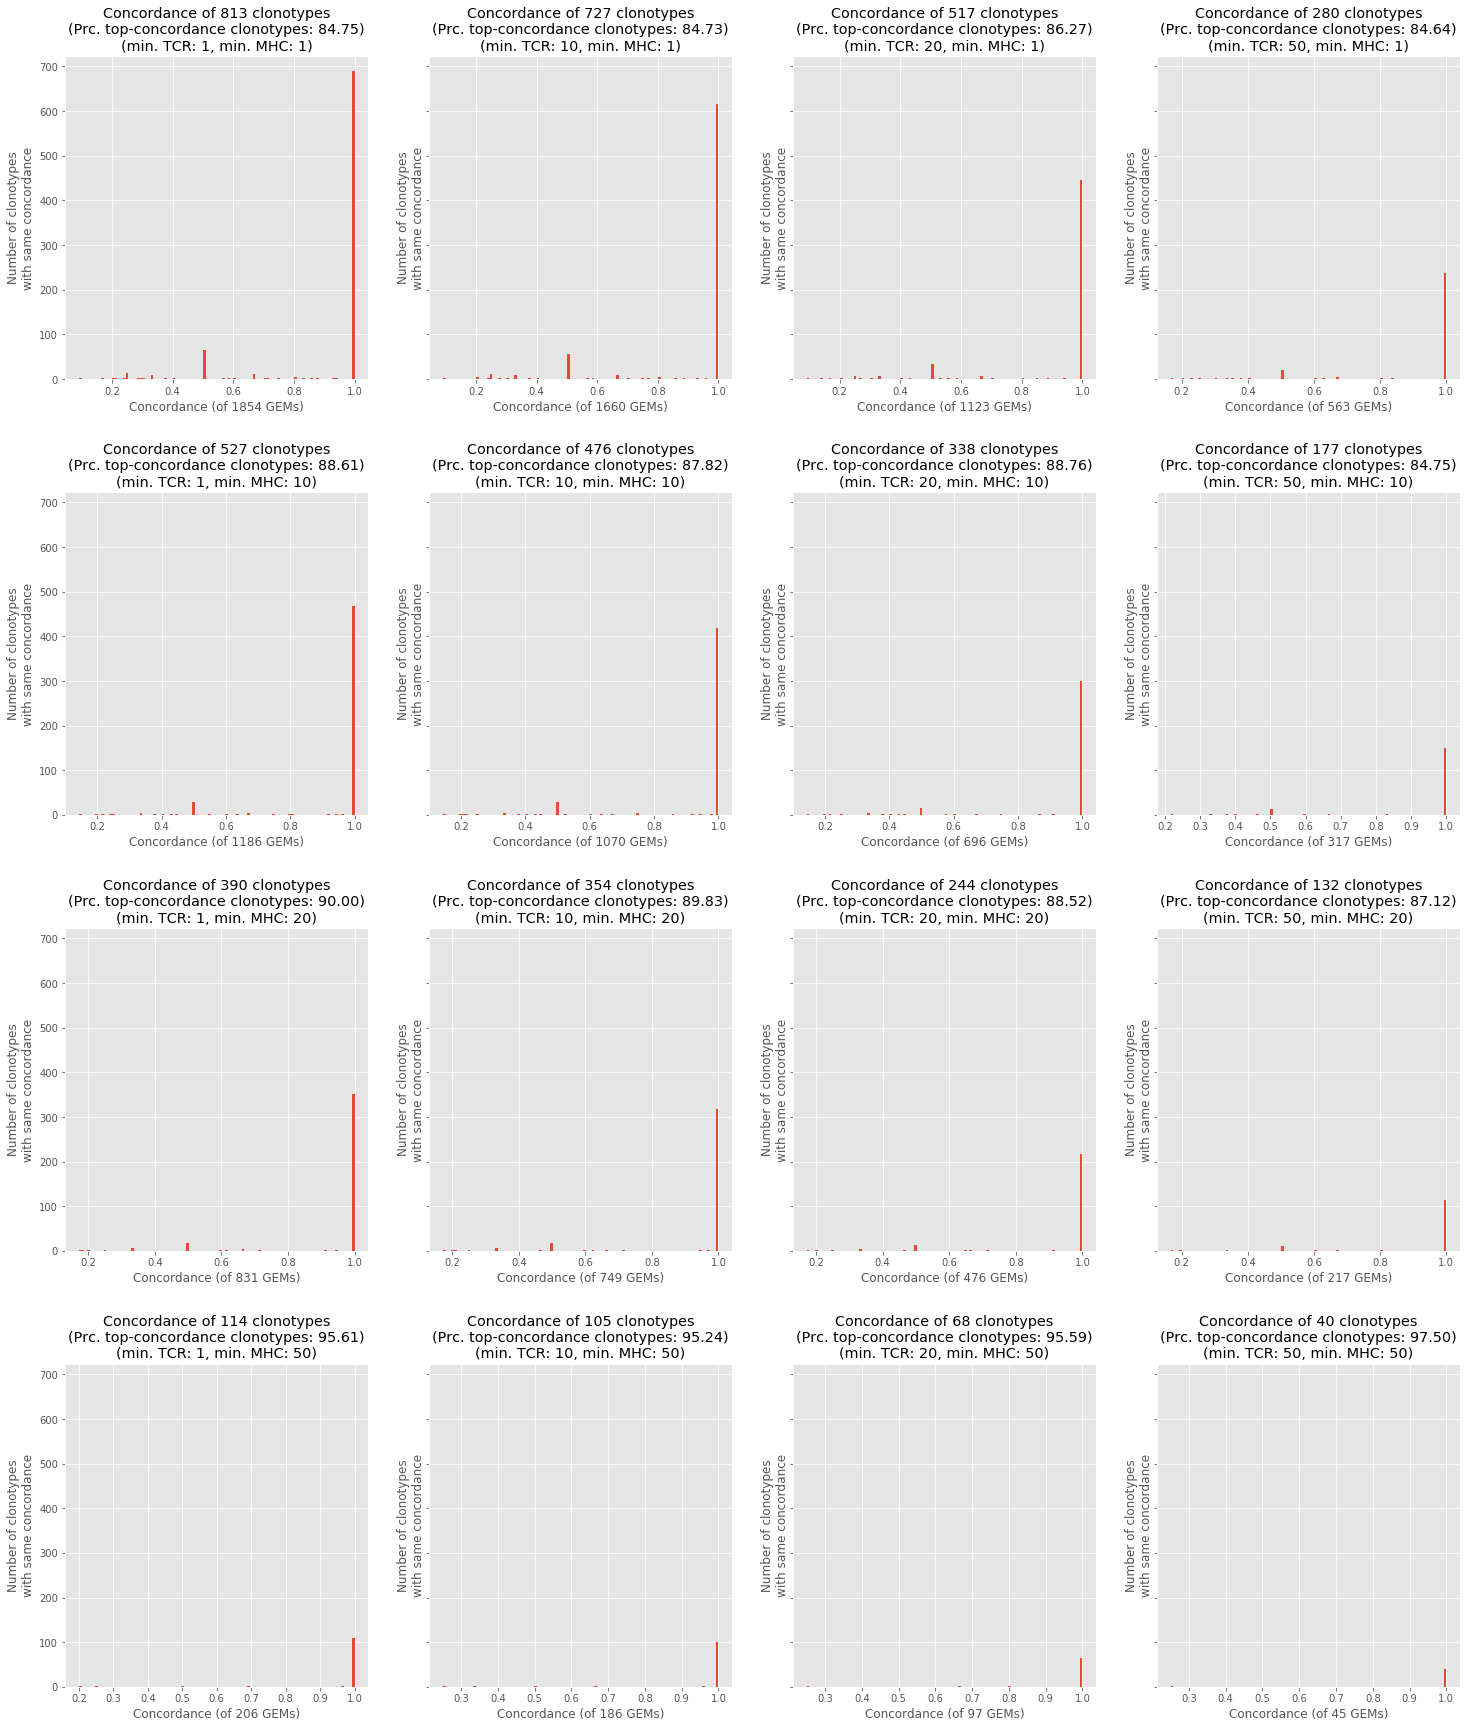

In [45]:
mhc_read_threshold = 1
tcr_read_threshold = 10

#fig = plt.figure(figsize=(25,30))
fig, ax = plt.subplots(4, 4, sharey=True, figsize=(25,30))
fig.subplots_adjust(hspace=0.35)

for i, mhc_read_threshold in enumerate([1, 10, 20, 50]):
    for j, tcr_read_threshold in enumerate([1, 10, 20, 50]):
        t_df = credible_df[(credible_df.read_counts_mhc >= mhc_read_threshold) & (credible_df.umis_tcr >= tcr_read_threshold)]
        a = t_df.groupby(['clonotype','epitope']).gem.count().to_frame()
        a.rename(columns={'gem': 'gems_per_specificity'}, inplace=True)

        b = t_df.groupby(['clonotype']).gem.count().to_frame()
        b.rename(columns={'gem': 'gems_per_clonotype'}, inplace=True)

        c = pd.merge(a,b, on='clonotype')
        c['binding_concordance'] = c.gems_per_specificity / c.gems_per_clonotype

        #print(c.groupby('clonotype').binding_concordance.max().mean())
        #plt.boxplot(c.groupby('clonotype').binding_concordance.max().values)
        #plt.show()

        #plt.subplot(4, 4, i*4+j)
        ax[i,j].hist(c.groupby('clonotype').binding_concordance.max().values, bins=100)
        ax[i,j].set_ylabel("Number of clonotypes\nwith same concordance")
        ax[i,j].set_xlabel("Concordance (of %i GEMs)" %b.gems_per_clonotype.sum())
        ax[i,j].set_title("Concordance of %i clonotypes\n(Prc. top-concordance clonotypes: %3.2f)\n(min. TCR: %i, min. MHC: %i)" %(b.size, (c.groupby('clonotype').binding_concordance.max() == 1).sum()/b.size*100, tcr_read_threshold, mhc_read_threshold))
        #plt.subplots_adjust(hspace=0.4)
plt.show()

In [44]:
(c.groupby('clonotype').binding_concordance.max() == 1).sum()/b.size

0.975

In [40]:
(c.groupby('clonotype').binding_concordance.max() == 1)

clonotype
clonotype1       False
clonotype115      True
clonotype1197     True
clonotype121      True
clonotype1282     True
clonotype136      True
clonotype138      True
clonotype1384     True
clonotype1397     True
clonotype1441     True
clonotype1471     True
clonotype149      True
clonotype153      True
clonotype2        True
clonotype2066     True
clonotype207      True
clonotype2200     True
clonotype2217     True
clonotype2318     True
clonotype2327     True
clonotype2339     True
clonotype24       True
clonotype2407     True
clonotype2429     True
clonotype2489     True
clonotype2660     True
clonotype2688     True
clonotype280      True
clonotype31       True
clonotype316      True
clonotype32       True
clonotype5        True
clonotype51       True
clonotype54       True
clonotype628      True
clonotype677      True
clonotype7        True
clonotype76       True
clonotype775      True
clonotype918      True
Name: binding_concordance, dtype: bool

In [37]:
c.groupby('clonotype').binding_concordance.max()[(c.groupby('clonotype').binding_concordance.max() == 1).values]

clonotype
clonotype115     1.0
clonotype1197    1.0
clonotype121     1.0
clonotype1282    1.0
clonotype136     1.0
clonotype138     1.0
clonotype1384    1.0
clonotype1397    1.0
clonotype1441    1.0
clonotype1471    1.0
clonotype149     1.0
clonotype153     1.0
clonotype2       1.0
clonotype2066    1.0
clonotype207     1.0
clonotype2200    1.0
clonotype2217    1.0
clonotype2318    1.0
clonotype2327    1.0
clonotype2339    1.0
clonotype24      1.0
clonotype2407    1.0
clonotype2429    1.0
clonotype2489    1.0
clonotype2660    1.0
clonotype2688    1.0
clonotype280     1.0
clonotype31      1.0
clonotype316     1.0
clonotype32      1.0
clonotype5       1.0
clonotype51      1.0
clonotype54      1.0
clonotype628     1.0
clonotype677     1.0
clonotype7       1.0
clonotype76      1.0
clonotype775     1.0
clonotype918     1.0
Name: binding_concordance, dtype: float64

In [39]:
a.groupby(['clonotype']).gems_per_specificity.unique()

clonotype
clonotype1       [1]
clonotype115     [2]
clonotype1197    [1]
clonotype121     [1]
clonotype1282    [1]
clonotype136     [1]
clonotype138     [1]
clonotype1384    [1]
clonotype1397    [1]
clonotype1441    [1]
clonotype1471    [1]
clonotype149     [2]
clonotype153     [1]
clonotype2       [1]
clonotype2066    [1]
clonotype207     [1]
clonotype2200    [1]
clonotype2217    [1]
clonotype2318    [1]
clonotype2327    [1]
clonotype2339    [1]
clonotype24      [1]
clonotype2407    [1]
clonotype2429    [1]
clonotype2489    [1]
clonotype2660    [1]
clonotype2688    [1]
clonotype280     [1]
clonotype31      [1]
clonotype316     [1]
clonotype32      [1]
clonotype5       [1]
clonotype51      [1]
clonotype54      [1]
clonotype628     [1]
clonotype677     [1]
clonotype7       [1]
clonotype76      [1]
clonotype775     [1]
clonotype918     [1]
Name: gems_per_specificity, dtype: object

In [ ]:
gems = sub_df.groupby(['clonotype']).gems_per_specificity.mean().values

In [97]:
b.shape

(727, 1)

In [29]:
credible_df = pd.merge(tmp_df, gems_per_specificity_df, on=['clonotype', 'epitope'], how='left').merge(gems_per_clonotype_df, on='clonotype', how='left')

In [30]:
credible_df['binding_concordance'] = credible_df.gems_per_specificity / credible_df.gems_per_clonotype

In [99]:
credible_df.groupby(['clonotype','epitope']).gem.count().to_frame().reset_index()

,clonotype,epitope,gem
0,clonotype1,134 (I-A22)neo26,5
1,clonotype1,20 (A20)neo37,1
2,clonotype1,A11_17_1_11,2
3,clonotype1,CLYBL,7
4,clonotype1,E24_MELPEP-139,1
5,clonotype1,v10,1
6,clonotype1,v11,1
7,clonotype1,v13,1
8,clonotype1,v15,8
9,clonotype1,v17,1


In [100]:
credible_df.groupby(['clonotype']).gem.count().to_frame().reset_index()

,clonotype,gem
0,clonotype1,52
1,clonotype10,23
2,clonotype100,2
3,clonotype1013,2
4,clonotype1014,2
5,clonotype1053,1
6,clonotype106,2
7,clonotype1067,2
8,clonotype1068,2
9,clonotype1088,4


In [101]:
gems_per_specificity_df = credible_df.groupby(['clonotype','epitope']).gem.count().to_frame().reset_index()
gems_per_specificity_df.rename(columns={'gem': 'gems_per_specificity'}, inplace=True)

In [102]:
gems_per_clonotype_df = credible_df.groupby(['clonotype']).gem.count().to_frame().reset_index()
gems_per_clonotype_df.rename(columns={'gem': 'gems_per_clonotype'}, inplace=True)

In [103]:
binding_concordance_df = pd.merge(gems_per_specificity_df, gems_per_clonotype_df, on=['clonotype'], how='left')

In [106]:
binding_concordance_df['binding_concordance'] = binding_concordance_df.gems_per_specificity / binding_concordance_df.gems_per_clonotype

In [107]:
binding_concordance_df

,clonotype,epitope,gems_per_specificity,gems_per_clonotype,binding_concordance
0,clonotype1,134 (I-A22)neo26,5,52,0.096154
1,clonotype1,20 (A20)neo37,1,52,0.019231
2,clonotype1,A11_17_1_11,2,52,0.038462
3,clonotype1,CLYBL,7,52,0.134615
4,clonotype1,E24_MELPEP-139,1,52,0.019231
5,clonotype1,v10,1,52,0.019231
6,clonotype1,v11,1,52,0.019231
7,clonotype1,v13,1,52,0.019231
8,clonotype1,v15,8,52,0.153846
9,clonotype1,v17,1,52,0.019231


In [49]:
credible_df['binding_concordance'] = credible_df.gems_per_specificity / credible_df.gems_per_clonotype

{'whiskers': [<matplotlib.lines.Line2D at 0x1212ab2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1208aea20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1212ab588>],
 'medians': [<matplotlib.lines.Line2D at 0x1208ae9e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1208ae3c8>],
 'means': []}

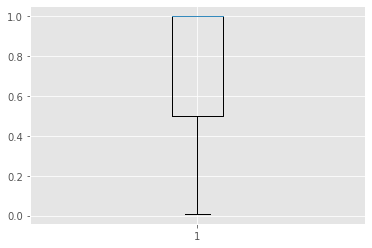

In [98]:
plt.boxplot(credible_df[credible_df.read_counts_mhc >= 20].binding_concordance.dropna().values)

In [94]:
credible_df.binding_concordance.describe()

count    1205.000000
mean        0.729395
std         0.362953
min         0.008696
25%         0.495652
50%         1.000000
75%         1.000000
max         1.000000
Name: binding_concordance, dtype: float64

In [78]:
credible_df.sort_values(by=['num_clonotype', 'gem'])[credible_df.gem == 'AAAGATGAGGTGACCA-1'].clonotype

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


6    clonotype528
5    clonotype528
4    clonotype528
3    clonotype528
Name: clonotype, dtype: object

In [71]:
credible_df.groupby(['gem']).size()

gem
AAACCTGAGTTCGATC-1    1
AAACGGGCAGGTCTCG-1    1
AAACGGGTCCAGAGGA-1    1
AAAGATGAGGTGACCA-1    4
AAAGATGCACCGAATT-1    1
AAAGATGTCTCAACTT-1    2
AAAGCAAGTATTAGCC-1    1
AAATGCCAGACGCACA-1    1
AAATGCCTCGTTTGCC-1    1
AACACGTTCTTGAGAC-1    1
AACCATGCACCAGGTC-1    1
AACCATGGTTGCGTTA-1    1
AACCATGTCGGTCCGA-1    2
AACCGCGCAGGAATGC-1    1
AACCGCGTCAGCTTAG-1    1
AACGTTGCAGACGCTC-1    1
AACTCAGGTCTCACCT-1    2
AACTCAGTCTTGAGAC-1    1
AACTCTTCACCAGCAC-1    4
AACTGGTAGCCCGAAA-1    1
AACTGGTCATTTCAGG-1    1
AACTTTCTCATTGCGA-1    1
AAGCCGCAGGCTAGAC-1    1
AAGCCGCAGTGATCGG-1    1
AAGCCGCGTTGAGTTC-1    4
AAGCCGCTCCCTAACC-1    1
AAGGAGCAGCTAAGAT-1    1
AAGGAGCCAGTGACAG-1    1
AAGGAGCGTTTGTGTG-1    1
AAGGCAGTCTTTACGT-1    1
                     ..
TTCTTAGCAATGAAAC-1    2
TTGAACGCAAGTCTAC-1    1
TTGAACGCATAAAGGT-1    1
TTGAACGGTAAGGGAA-1    2
TTGCCGTAGGAGTTTA-1    6
TTGCCGTTCAACACGT-1    2
TTGCCGTTCGGAAATA-1    1
TTGCCGTTCTGGTGTA-1    1
TTGCGTCAGCTATGCT-1    1
TTGCGTCAGTGACATA-1    1
TTGCGTCAGTGT

In [61]:
print(len(credible_df.umis_TRA.values))
print(len(credible_df.umis_TRA.values + credible_df.umis_TRB.values))

1237
1237


In [59]:
credible_df.umis_TRA.values + credible_df.umis_TRB.values

array([32., 33., 36., ..., 42., 31., 32.])

In [43]:
d = ax.collections[0]

d.set_offset_position('data')

print(d.get_offsets())

[[0.0 22.0]
 [1.0 34.0]
 [2.0 1.0]
 [3.0 24.0]
 [4.0 25.0]
 [5.0 28.0]
 [6.0 30.0]
 [7.0 21.0]
 [8.0 1.0]
 [9.0 34.0]
 [10.0 1.0]
 [11.0 26.0]
 [12.0 1.0]
 [13.0 1.0]
 [14.0 1.0]
 [15.0 24.0]
 [16.0 46.0]
 [17.0 1.0]
 [18.0 1.0]
 [19.0 14.0]
 [20.0 53.0]
 [21.0 20.0]
 [22.0 55.0]
 [23.0 54.0]
 [24.0 27.0]
 [25.0 1.0]
 [26.0 1.0]
 [27.0 37.0]
 [28.0 1.0]
 [29.0 1.0]
 [30.0 22.0]
 [31.0 30.0]
 [32.0 18.0]
 [33.0 26.0]
 [34.0 25.0]
 [35.0 74.0]
 [36.0 27.0]
 [37.0 1.0]
 [38.0 31.0]
 [39.0 1.0]
 [40.0 35.0]
 [41.0 1.0]
 [42.0 33.0]
 [43.0 1.0]
 [44.0 14.0]
 [45.0 27.0]
 [46.0 20.0]
 [47.0 1.0]
 [48.0 2.0]
 [49.0 48.0]
 [50.0 1.0]
 [51.0 22.0]]


In [46]:
pd.DataFrame(d.get_offsets(), columns=['x','y']).x

0      0.0
1      1.0
2      2.0
3      3.0
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.0
17    17.0
18    18.0
19    19.0
20    20.0
21    21.0
22    22.0
23    23.0
24    24.0
25    25.0
26    26.0
27    27.0
28    28.0
29    29.0
30    30.0
31    31.0
32    32.0
33    33.0
34    34.0
35    35.0
36    36.0
37    37.0
38    38.0
39    39.0
40    40.0
41    41.0
42    42.0
43    43.0
44    44.0
45    45.0
46    46.0
47    47.0
48    48.0
49    49.0
50    50.0
51    51.0
Name: x, dtype: float64

In [35]:
ax.get_xlim()

(-28.14113173814028, 587.6456398389041)

In [37]:
scatter

# Testing

In [50]:
df = credible_df[(credible_df.epitope == 'v6') & (credible_df.read_counts_mhc >= read_threshold) & (credible_df.clonotype != 'None')]

In [51]:
df.loc[:,['gem', 'clonotype', 'epitope','gems_per_clonotype','gems_per_specificity', 'binding_concordance']]

,gem,clonotype,epitope,gems_per_clonotype,gems_per_specificity,binding_concordance
3656,CACACCTAGAAAGTGG-1,clonotype56,v6,1,1.0,1.0
3737,CGCTTCACAATAACGA-1,clonotype67,v6,1,1.0,1.0
2839,CGTTGGGCATTTGCCC-1,clonotype1529,v6,1,1.0,1.0
3283,TCGTAGAGTGTAATGA-1,clonotype2449,v6,2,2.0,1.0
3282,TCGTAGAGTGTAATGA-1,clonotype2449,v6,2,2.0,1.0
3338,TTATGCTAGGCCATAG-1,clonotype2647,v6,1,1.0,1.0


In [18]:
df.clonotype.str.split('clonotype').str[1].unique()

array(['1', '111', '1192', '1476', '1533', '156', '1591', '1688', '1705',
       '195', '1969', '2', '2013', '2069', '2337', '27', '2710', '357',
       '389', '4', '402', '453', '5', '658', '745', '85', '87'],
      dtype=object)

In [19]:
df.clonotype.unique()

array(['clonotype1', 'clonotype111', 'clonotype1192', 'clonotype1476',
       'clonotype1533', 'clonotype156', 'clonotype1591', 'clonotype1688',
       'clonotype1705', 'clonotype195', 'clonotype1969', 'clonotype2',
       'clonotype2013', 'clonotype2069', 'clonotype2337', 'clonotype27',
       'clonotype2710', 'clonotype357', 'clonotype389', 'clonotype4',
       'clonotype402', 'clonotype453', 'clonotype5', 'clonotype658',
       'clonotype745', 'clonotype85', 'clonotype87'], dtype=object)

In [28]:
df.groupby(['clonotype']).binding_concordance.mean()

clonotype
clonotype1       0.122807
clonotype111     0.333333
clonotype1192    1.000000
clonotype1476    1.000000
clonotype1533    1.000000
clonotype156     1.000000
clonotype1591    1.000000
clonotype1688    1.000000
clonotype1705    1.000000
clonotype195     0.500000
clonotype1969    1.000000
clonotype2       0.486726
clonotype2013    1.000000
clonotype2069    1.000000
clonotype2337    1.000000
clonotype27      0.750000
clonotype2710    1.000000
clonotype357     0.500000
clonotype389     0.333333
clonotype4       0.050847
clonotype402     1.000000
clonotype453     1.000000
clonotype5       0.071429
clonotype658     1.000000
clonotype745     1.000000
clonotype85      0.200000
clonotype87      1.000000
Name: binding_concordance, dtype: float64

In [37]:
df.groupby(['clonotype']).gem.count()

clonotype
clonotype1       1
clonotype1088    1
clonotype123     1
clonotype1647    1
clonotype2       7
clonotype2037    1
clonotype218     1
clonotype226     1
clonotype233     1
clonotype24      1
clonotype2466    1
clonotype258     1
clonotype2666    1
clonotype269     1
clonotype3       1
clonotype328     1
clonotype59      1
clonotype63      1
clonotype75      1
clonotype85      1
Name: gem, dtype: int64

In [39]:
df.groupby(['clonotype','epitope']).gem.count()

clonotype      epitope
clonotype1     v10        1
clonotype1088  v10        1
clonotype123   v10        1
clonotype1647  v10        1
clonotype2     v10        7
clonotype2037  v10        1
clonotype218   v10        1
clonotype226   v10        1
clonotype233   v10        1
clonotype24    v10        1
clonotype2466  v10        1
clonotype258   v10        1
clonotype2666  v10        1
clonotype269   v10        1
clonotype3     v10        1
clonotype328   v10        1
clonotype59    v10        1
clonotype63    v10        1
clonotype75    v10        1
clonotype85    v10        1
Name: gem, dtype: int64

In [22]:
df.groupby(['gem']).clonotype.sum()

gem
AAGGAGCGTTTGTGTG-1       clonotype1
AATCGGTCATGCCTTC-1     clonotype328
ACACCGGTCCCTGACT-1       clonotype2
ACACTGAGTATAATGG-1       clonotype2
ACGATACTCTCGTTTA-1      clonotype85
ATAGACCGTTATCCGA-1       clonotype2
CAACTAGTCTGCGACG-1     clonotype123
CACACTCGTAACGACG-1    clonotype1088
CCGTTCACATTCGACA-1     clonotype269
CCTTCGAGTTGCCTCT-1     clonotype218
CGCTATCCAGTAAGAT-1       clonotype2
CGGACTGAGGACAGAA-1       clonotype3
CTCAGAAGTCGATTGT-1      clonotype75
CTGATCCGTTACGGAG-1    clonotype1647
GAATGAATCCTCATTA-1       clonotype2
GACCAATCACCAGGTC-1     clonotype233
GAGTCCGCAATGCCAT-1       clonotype2
GATCGTACACGGATAG-1      clonotype24
GGATGTTTCCTGCAGG-1       clonotype2
GGCTCGAAGCCTCGTG-1    clonotype2037
GTTCGGGCACTTCGAA-1      clonotype59
TCCCGATGTGTGTGCC-1     clonotype226
TCTGGAAAGCTGAAAT-1    clonotype2466
TTCTACATCGACCAGC-1    clonotype2666
TTGAACGGTAAGGGAA-1      clonotype63
TTGCGTCTCGAACGGA-1     clonotype258
Name: clonotype, dtype: object

In [18]:
credible_df.groupby(['gem']).clonotype.nunique()#.eq(1).all()

gem
AAACCTGAGGAACTGC-1    1
AAACCTGAGGTGATTA-1    1
AAACCTGAGTTCGATC-1    1
AAACCTGCAATGCCAT-1    1
AAACCTGCAGCATGAG-1    1
AAACCTGCAGTAACGG-1    1
AAACCTGCATCTCCCA-1    1
AAACCTGTCACATAGC-1    1
AAACCTGTCCCTCTTT-1    1
AAACCTGTCGAACTGT-1    1
AAACGGGAGCGTGAAC-1    1
AAACGGGAGTACGCCC-1    1
AAACGGGCAGGAATGC-1    1
AAACGGGCAGGTCTCG-1    1
AAACGGGGTACAGCAG-1    1
AAACGGGGTGGAAAGA-1    1
AAACGGGGTTAGATGA-1    1
AAACGGGGTTCCCTTG-1    1
AAACGGGTCCAGAGGA-1    1
AAAGATGAGATATGGT-1    1
AAAGATGAGGTGACCA-1    1
AAAGATGAGTGTGAAT-1    1
AAAGATGCAAGAAGAG-1    1
AAAGATGCACCGAATT-1    1
AAAGATGGTTGAGGTG-1    1
AAAGATGTCTCAACTT-1    1
AAAGATGTCTGGGCCA-1    1
AAAGCAAAGGACACCA-1    1
AAAGCAAGTATCAGTC-1    1
AAAGCAAGTATTAGCC-1    1
                     ..
TTTACTGCATCAGTAC-1    1
TTTACTGGTTAGTGGG-1    1
TTTATGCAGAGCTGCA-1    1
TTTATGCAGAGCTGGT-1    1
TTTATGCAGGGAAACA-1    1
TTTATGCAGTTAAGTG-1    1
TTTATGCCAAAGGTGC-1    1
TTTATGCCAAGCTGGA-1    1
TTTATGCCACTATCTT-1    1
TTTATGCTCTTCGAGA-1    1
TTTCCTCCACAG

In [12]:
credible_df

,gem,clonotype,tso_mhc,b_primer_mhc,anneal_mhc,a_primer_mhc,match_mhc,credible_alignment_mhc,tso_cd8,b_primer_cd8,...,v38,v39,v4,v40,v41,v5,v6,v7,v8,v9
8082,TGCGCAGTCTCTGTCG-1,None,TSO,PRIMER_B,ANNEAL,PRIMER_MHC,4.0,True,TSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9124,TAGTGGTAGTAACCCT-1,None,TSO,NaN,ANNEAL,PRIMER_MHC,3.0,True,TSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9125,TAGTGGTAGTAACCCT-1,None,TSO,NaN,ANNEAL,PRIMER_MHC,3.0,True,TSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9127,TATCTCATCACGCGGT-1,None,TSO,NaN,ANNEAL,PRIMER_MHC,3.0,True,TSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9128,TATTACCGTCAGAATA-1,None,TSO,NaN,ANNEAL,PRIMER_MHC,3.0,True,TSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9129,TCAACGACAGCAGTTT-1,None,TSO,NaN,ANNEAL,PRIMER_MHC,3.0,True,TSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9130,TCACGAAAGTACGTTC-1,None,TSO,NaN,ANNEAL,PRIMER_MHC,3.0,True,TSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9133,TCAGGTAAGCTAGCCC-1,None,TSO,NaN,ANNEAL,PRIMER_MHC,3.0,True,TSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9134,TCAGGTAGTCGCTTTC-1,None,TSO,NaN,ANNEAL,PRIMER_MHC,3.0,True,TSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9135,TCAGGTAGTCGCTTTC-1,None,TSO,NaN,ANNEAL,PRIMER_MHC,3.0,True,TSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
sub_df

,gem,clonotype,tso_mhc,b_primer_mhc,anneal_mhc,a_primer_mhc,match_mhc,credible_alignment_mhc,tso_cd8,b_primer_cd8,...,v38,v39,v4,v40,v41,v5,v6,v7,v8,v9
5193,TCTGGAATCTGCTTGC-1,clonotype5,TSO,NaN,ANNEAL,PRIMER_MHC,3.0,True,TSO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
